In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy.stats as stats

In [13]:
import os
os.getcwd()

'/Users/we/Downloads/업무/buy it again_분석 /ver2'

In [14]:
ext_monitor = pd.read_csv('../ext_monitor.csv')

In [15]:
ext_monitor.shape

(1583, 7)

In [16]:
ext_monitor.head()

,Unnamed: 0,biz_dt,mid,price,prodNo,dcateCd,dcateNm
0,463,2018-07-30 18:24:35,24186071,96900,101376413,4104294,이외 브랜드
1,171,2018-08-01 00:05:39,6973887,209000,100639808,4104294,이외 브랜드
2,172,2018-08-01 00:06:44,16412994,209000,100639808,4104294,이외 브랜드
3,707,2018-08-01 01:37:21,21777114,269000,100515472,4104294,이외 브랜드
4,295,2018-08-01 09:34:35,5003017,204000,100342481,4104294,이외 브랜드


In [17]:
ext_monitor.price.mean()

244099.21604548325

In [18]:
ext_monitor.mid.shape  # 거래 건수

(1583,)

In [19]:
ext_monitor.mid.nunique()

1423

In [20]:
ext_monitor.mid.duplicated()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7        True
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16       True
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
1553    False
1554    False
1555    False
1556    False
1557    False
1558    False
1559    False
1560    False
1561    False
1562    False
1563    False
1564    False
1565    False
1566    False
1567     True
1568    False
1569    False
1570    False
1571    False
1572    False
1573    False
1574    False
1575    False
1576    False
1577    False
1578    False
1579    False
1580     True
1581    False
1582    False
Name: mid, Length: 1583, dtype: bool

In [21]:
ext_monitor.mid[:30] # 15,16처럼 반복 구매를 집계하기위한 RCP

0     24186071
1      6973887
2     16412994
3     21777114
4      5003017
5     20962442
6      3818011
7      3818011
8      4362790
9     21280380
10     9661634
11    25098892
12    25356830
13    22051024
14     3918051
15     4400719
16     4400719
17    21550749
18    22384158
19     9971663
20     2158320
21     9369025
22    20813781
23    19993361
24    24707920
25     5176775
26     3520669
27     2481283
28    15874208
29     9337511
Name: mid, dtype: int64

In [22]:
ext_monitor.mid.drop_duplicates().shape[0] # distinct user

1423

In [23]:
ext_monitor.mid[ext_monitor.mid.duplicated()].nunique()  # 2번이상 구매한 user는 330명

128

In [24]:
ext_monitor.mid[ext_monitor.mid.duplicated()].nunique() / ext_monitor.mid.nunique()

0.08995080815179199

---

In [25]:
ext_monitor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1583 entries, 0 to 1582
Data columns (total 7 columns):
Unnamed: 0    1583 non-null int64
biz_dt        1583 non-null object
mid           1583 non-null int64
price         1583 non-null int64
prodNo        1583 non-null int64
dcateCd       1583 non-null int64
dcateNm       1583 non-null object
dtypes: int64(5), object(2)
memory usage: 86.6+ KB


In [26]:
# 날짜 형 변환
ext_monitor.biz_dt = pd.to_datetime(ext_monitor.biz_dt)

In [27]:
ext_monitor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1583 entries, 0 to 1582
Data columns (total 7 columns):
Unnamed: 0    1583 non-null int64
biz_dt        1583 non-null datetime64[ns]
mid           1583 non-null int64
price         1583 non-null int64
prodNo        1583 non-null int64
dcateCd       1583 non-null int64
dcateNm       1583 non-null object
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 86.6+ KB


----

## # Step1. ext_monitor 데이터 이용 (8월~10월. 3달)

In [28]:
ext_monitor[0:1].biz_dt , ext_monitor[-1:].biz_dt

(0   2018-07-30 18:24:35
 Name: biz_dt, dtype: datetime64[ns], 1582   2018-10-31 23:24:50
 Name: biz_dt, dtype: datetime64[ns])

---

- #### (1) 전체 유저의 구매주기 파악

In [100]:
groups = ext_monitor.groupby('mid')

In [101]:
def day_diff(data):
    c = data.dt.date.diff()
    #c = c.values #이거?
    return pd.Series(c.values)

In [167]:
groups['biz_dt'].apply(day_diff)

mid        
1009146   0                 NaT
          1     1 days 00:00:00
1013554   0                 NaN
1018083   0                 NaN
1021530   0                 NaN
1033964   0                 NaN
1037700   0                 NaN
1041642   0                 NaN
1054369   0                 NaN
1062532   0                 NaN
1072788   0                 NaN
1073627   0                 NaN
1088417   0                 NaN
1096412   0                 NaN
1115061   0                 NaN
1131003   0                 NaN
1143939   0                 NaN
1144764   0                 NaN
1153970   0                 NaN
1167947   0                 NaT
          1    15 days 00:00:00
          2    20 days 00:00:00
          3     7 days 00:00:00
          4    15 days 00:00:00
          5     4 days 00:00:00
          6     0 days 00:00:00
1180097   0                 NaN
1181649   0                 NaN
1184814   0                 NaN
1187798   0                 NaN
                     ...    

In [169]:
# 위의 결과와 똑같네!
z = ext_monitor.biz_dt.groupby(ext_monitor.mid).apply(day_diff);z

mid        
1009146   0                 NaT
          1     1 days 00:00:00
1013554   0                 NaN
1018083   0                 NaN
1021530   0                 NaN
1033964   0                 NaN
1037700   0                 NaN
1041642   0                 NaN
1054369   0                 NaN
1062532   0                 NaN
1072788   0                 NaN
1073627   0                 NaN
1088417   0                 NaN
1096412   0                 NaN
1115061   0                 NaN
1131003   0                 NaN
1143939   0                 NaN
1144764   0                 NaN
1153970   0                 NaN
1167947   0                 NaT
          1    15 days 00:00:00
          2    20 days 00:00:00
          3     7 days 00:00:00
          4    15 days 00:00:00
          5     4 days 00:00:00
          6     0 days 00:00:00
1180097   0                 NaN
1181649   0                 NaN
1184814   0                 NaN
1187798   0                 NaN
                     ...    

In [103]:
ext_monitor_diff = groups['biz_dt'].apply(day_diff)  # 저장

In [104]:
ext_monitor_diff = pd.DataFrame(ext_monitor_diff)

In [105]:
ext_monitor_diff.biz_dt = pd.to_timedelta(ext_monitor_diff.biz_dt)  # timedelta 로 저장

In [106]:
ext_monitor_diff.head()

biz_dt
mid             
1009146 0    NaT
        1 1 days
1013554 0    NaT
1018083 0    NaT
1021530 0    NaT

In [110]:
ext_monitor_diff

biz_dt
mid               
1009146  0     NaT
         1  1 days
1013554  0     NaT
1018083  0     NaT
1021530  0     NaT
1033964  0     NaT
1037700  0     NaT
1041642  0     NaT
1054369  0     NaT
1062532  0     NaT
1072788  0     NaT
1073627  0     NaT
1088417  0     NaT
1096412  0     NaT
1115061  0     NaT
1131003  0     NaT
1143939  0     NaT
1144764  0     NaT
1153970  0     NaT
1167947  0     NaT
         1 15 days
         2 20 days
         3  7 days
         4 15 days
         5  4 days
         6  0 days
1180097  0     NaT
1181649  0     NaT
1184814  0     NaT
1187798  0     NaT
...            ...
25956180 0     NaT
         1  0 days
25961215 0     NaT
25964182 0     NaT
25966010 0     NaT
25967219 0     NaT
25970961 0     NaT
25974243 0     NaT
25978987 0     NaT
25988013 0     NaT
25990201 0     NaT
26003159 0     NaT
26034726 0     NaT
26039992 0     NaT
26051689 0     NaT
26051940 0     NaT
26056047 0     NaT
26058081 0     NaT
26071823 0     NaT
26073430 0     NaT
26075382 0     NaT
26075460 0     NaT
26077986 0     NaT
26085672 0     NaT
26089235 0     NaT
26091804 0     NaT
26101863 0     NaT
26106918 0     NaT
26115848 0     NaT
26116449 0     NaT

[1583 rows x 1 columns]

In [118]:
k = ext_monitor_diff.unstack()

In [122]:
k.head()

biz_dt                           
             0      1   2   3   4   5   6
mid                                      
1009146    NaT 1 days NaT NaT NaT NaT NaT
1013554    NaT    NaT NaT NaT NaT NaT NaT
1018083    NaT    NaT NaT NaT NaT NaT NaT
1021530    NaT    NaT NaT NaT NaT NaT NaT
1033964    NaT    NaT NaT NaT NaT NaT NaT

In [126]:
k.index

Int64Index([ 1009146,  1013554,  1018083,  1021530,  1033964,  1037700,
             1041642,  1054369,  1062532,  1072788,
            ...
            26075382, 26075460, 26077986, 26085672, 26089235, 26091804,
            26101863, 26106918, 26115848, 26116449],
           dtype='int64', name='mid', length=1423)

In [133]:
k[0:1]

biz_dt                           
             0      1   2   3   4   5   6
mid                                      
1009146    NaT 1 days NaT NaT NaT NaT NaT

In [136]:
kk = k.to_dict()

In [142]:
kk.keys()

dict_keys([('biz_dt', 0), ('biz_dt', 1), ('biz_dt', 2), ('biz_dt', 3), ('biz_dt', 4), ('biz_dt', 5), ('biz_dt', 6)])

In [161]:
kkk = list(kk[('biz_dt', 1)].values());kkk

[Timedelta('1 days 00:00:00'),
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 Timedelta('15 days 00:00:00'),
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 Timedelta('0 days 00:00:00'),
 Timedelta('0 days 00:00:00'),
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 Timedelta('0 days 00:00:00'),
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 Timedelta('45 days 00:00:00'),
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 Timedelta('1 days 00:00:00'),
 NaT,
 NaT,
 NaT,
 NaT,
 Timedelta('3 days 00:00:00'),
 NaT,
 NaT,
 NaT,
 Timedelta('0 days 00:00:00'),
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 Timedelta('0 days 00:00:00'),
 NaT,
 Timedelta('3 days 00:00:00'),
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 Timedelta('1 days 00:00:00'),
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 Timedelta('7 days 00:00:00'),
 NaT,
 Timede

In [163]:
~np.isnan(kkk)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [113]:
pd.DataFrame(ext_monitor_diff)

biz_dt
mid               
1009146  0     NaT
         1  1 days
1013554  0     NaT
1018083  0     NaT
1021530  0     NaT
1033964  0     NaT
1037700  0     NaT
1041642  0     NaT
1054369  0     NaT
1062532  0     NaT
1072788  0     NaT
1073627  0     NaT
1088417  0     NaT
1096412  0     NaT
1115061  0     NaT
1131003  0     NaT
1143939  0     NaT
1144764  0     NaT
1153970  0     NaT
1167947  0     NaT
         1 15 days
         2 20 days
         3  7 days
         4 15 days
         5  4 days
         6  0 days
1180097  0     NaT
1181649  0     NaT
1184814  0     NaT
1187798  0     NaT
...            ...
25956180 0     NaT
         1  0 days
25961215 0     NaT
25964182 0     NaT
25966010 0     NaT
25967219 0     NaT
25970961 0     NaT
25974243 0     NaT
25978987 0     NaT
25988013 0     NaT
25990201 0     NaT
26003159 0     NaT
26034726 0     NaT
26039992 0     NaT
26051689 0     NaT
26051940 0     NaT
26056047 0     NaT
26058081 0     NaT
26071823 0     NaT
26073430 0     NaT
26075382 0     NaT
26075460 0     NaT
26077986 0     NaT
26085672 0     NaT
26089235 0     NaT
26091804 0     NaT
26101863 0     NaT
26106918 0     NaT
26115848 0     NaT
26116449 0     NaT

[1583 rows x 1 columns]

In [93]:
ext_monitor_diff.shape

(1583,)

In [94]:
#dropna
ext_monitor_diff = ext_monitor_diff.dropna()

In [98]:
ext_monitor_diff

mid        
1009146   1     1 days 00:00:00
1167947   1    15 days 00:00:00
          2    20 days 00:00:00
          3     7 days 00:00:00
          4    15 days 00:00:00
          5     4 days 00:00:00
          6     0 days 00:00:00
1341244   1     0 days 00:00:00
1345458   1     0 days 00:00:00
1446641   1     0 days 00:00:00
          2     0 days 00:00:00
          3     0 days 00:00:00
          4    29 days 00:00:00
1508515   1    45 days 00:00:00
1590770   1     1 days 00:00:00
1712482   1     3 days 00:00:00
1731961   1     0 days 00:00:00
1799295   1     0 days 00:00:00
1808032   1     3 days 00:00:00
          2    10 days 00:00:00
1887990   1     1 days 00:00:00
2057474   1     7 days 00:00:00
2078326   1     0 days 00:00:00
2115361   1     0 days 00:00:00
2269063   1     1 days 00:00:00
2411590   1     0 days 00:00:00
2557803   1    59 days 00:00:00
2712720   1     1 days 00:00:00
2866411   1     0 days 00:00:00
3520669   1     2 days 00:00:00
                     ...    

In [99]:
ext_monitor_diff

mid        
1009146   1     1 days 00:00:00
1167947   1    15 days 00:00:00
          2    20 days 00:00:00
          3     7 days 00:00:00
          4    15 days 00:00:00
          5     4 days 00:00:00
          6     0 days 00:00:00
1341244   1     0 days 00:00:00
1345458   1     0 days 00:00:00
1446641   1     0 days 00:00:00
          2     0 days 00:00:00
          3     0 days 00:00:00
          4    29 days 00:00:00
1508515   1    45 days 00:00:00
1590770   1     1 days 00:00:00
1712482   1     3 days 00:00:00
1731961   1     0 days 00:00:00
1799295   1     0 days 00:00:00
1808032   1     3 days 00:00:00
          2    10 days 00:00:00
1887990   1     1 days 00:00:00
2057474   1     7 days 00:00:00
2078326   1     0 days 00:00:00
2115361   1     0 days 00:00:00
2269063   1     1 days 00:00:00
2411590   1     0 days 00:00:00
2557803   1    59 days 00:00:00
2712720   1     1 days 00:00:00
2866411   1     0 days 00:00:00
3520669   1     2 days 00:00:00
                     ...    

In [38]:
ext_monitor_diff.to_csv('ext_monitor_diff.csv')

In [39]:
# 동일일자 구매는 제거하고, 평균 구하기

filter = pd.Timedelta('0')

In [40]:
ext_monitor_diff[ext_monitor_diff.biz_dt > filter].mean()  # 8일 정도네!

biz_dt   13 days 00:37:53.684210
dtype: timedelta64[ns]

In [41]:
ext_monitor_diff.shape

(160, 1)

In [42]:
8.8/7

1.2571428571428573

In [43]:
13/7

1.8571428571428572

### # groupby된, series데이터를 어떻게 하나의 열을 갖는 dataframe으로 관리할 수 있을까?

In [44]:
type(ext_monitor_diff.biz_dt)  # series 데이터야

pandas.core.series.Series

---

In [45]:
# 이게 해결책이 될 수 있다 : values를 빼왔는데, 이들의 type를 timedelta로 밝혀준거지! 그리고 저장하고!

ext_monitor_diff_days = ext_monitor_diff.values.astype('timedelta64[D]')

In [46]:
ext_monitor_diff_days = ext_monitor_diff_days/ np.timedelta64(1, 'D')

In [47]:
ext_monitor_diff_days_ = pd.DataFrame(ext_monitor_diff_days, columns = ['time']);ext_monitor_diff_days_.head()

,time
0,1.0
1,15.0
2,20.0
3,7.0
4,15.0


---

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a165a9630>]],
      dtype=object)

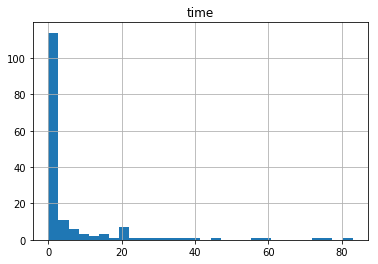

In [50]:
ext_monitor_diff_days_.hist(bins=30)  

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1659cf60>]],
      dtype=object)

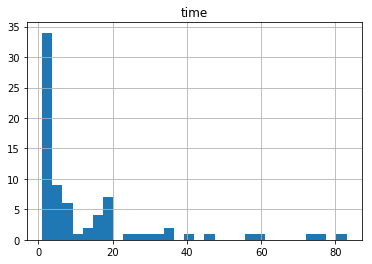

In [52]:
# 0을 제외하고
ext_monitor_diff_days_[ext_monitor_diff_days_.time != 0].hist(bins=30)

In [55]:
ext_monitor_diff_days_[ext_monitor_diff_days_.time == 0].shape

(84, 1)

In [53]:
np.array([ext_monitor_diff_days_.time != 0]).sum()

76

---

In [48]:
ext_monitor_diff_days_inver = 1/ext_monitor_diff_days_[ext_monitor_diff_days_!=0]  # 이렇게하면, ext_monitor_diff_days_!=0 가 dataframe으로 나와
                                                # 이유는, ext_monitor_diff_days.time != 0 이런식으로 안해서.(series vs dataframe)

    ext_monitor_diff_days_iver = ext_monitor_diff_days_inver.dropna()    

In [50]:
ext_monitor_diff_days_inver7 = ext_monitor_diff_days_iver*7

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116105240>]],
      dtype=object)

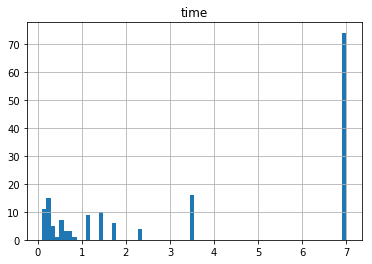

In [53]:
ext_monitor_diff_days_inver7.hist(bins=70)  # 구매주기가 짧으니깐 이렇게 나온다...

In [56]:
#차장님이 주신 3개월치의 데이터에서는 alpha : 0.991580757, beta : 1.804783562

alpha_, _,scale_ = stats.gamma.fit(ext_monitor_diff_days_inver7, floc=0);alpha_, 1/scale_ 

(0.9453224943509928, 0.24578493124550185)

---

---

- (번외): 어느정도 기간의 거래데이터인가?

In [57]:
ext_monitor[-1:].biz_dt

1559   2018-10-31 23:47:51
Name: biz_dt, dtype: datetime64[ns]

----

---

- #### (2) ver2의 '구매횟수' 관점

In [ ]:
# 같은 일자는 '거래일=1'로 본다.
'''
def day(data):
    c = data.dt.date.nunique()
    return c
'''

In [66]:
# 같은 일자의 거래도, '모든' 거래로 본다.
def day(data):
    c = data.nunique()
    return c


In [67]:
ext_monitor_buy = groups['biz_dt'].apply(day)

In [68]:
ext_monitor_buy[:10]

mid
1000319    1
1009758    1
1015504    1
1022764    1
1032048    2
1043076    1
1048764    1
1054000    1
1054119    1
1054955    1
Name: biz_dt, dtype: int64

---

In [69]:
ext_monitor_buy = pd.DataFrame(ext_monitor_buy)

In [70]:
type(ext_monitor_buy)

pandas.core.frame.DataFrame

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1ab80198>]],
      dtype=object)

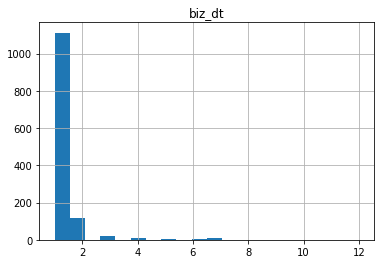

In [72]:
ext_monitor_buy.hist(bins=20)

In [82]:
ext_monitor_buy.sort_values(by=['biz_dt'],ascending=False).head()  # 최다 구매자가 12주에 12번 구매한사람이네

,biz_dt
mid,
1550240,12
7067567,9
25327711,7
23157736,7
2056555,7


In [83]:
#최다 구매자의 구매정보

ext_monitor[ext_monitor.mid==1550240]

,Unnamed: 0,biz_dt,mid,price,prodNo,dcateCd,dcateNm
27,449,2018-08-01 10:28:24,1550240,402000,102038755,4101182,Playstation
30,274,2018-08-01 10:30:29,1550240,515000,102042687,4101182,Playstation
124,830,2018-08-07 10:10:12,1550240,404000,102590529,4101182,Playstation
269,907,2018-08-17 13:59:07,1550240,404000,106329551,4101182,Playstation
271,887,2018-08-17 14:02:11,1550240,404000,106329551,4101182,Playstation
342,912,2018-08-22 16:11:59,1550240,404000,106329551,4101182,Playstation
451,510,2018-09-02 21:39:46,1550240,404000,109012990,4101182,Playstation
452,527,2018-09-02 21:47:12,1550240,404000,109012990,4101182,Playstation
676,529,2018-09-14 23:25:24,1550240,404000,109012990,4101182,Playstation
847,1033,2018-10-01 12:48:39,1550240,404000,109012990,4101182,Playstation


In [73]:
ext_monitor_buy_ = ext_monitor_buy/12.0  # 12주의 데이터(3달)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1ae7b198>]],
      dtype=object)

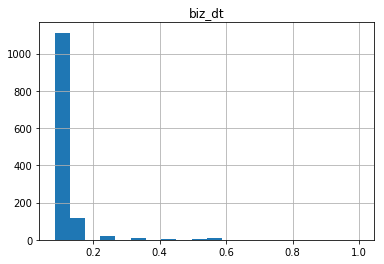

In [75]:
ext_monitor_buy_.hist(bins=20)

In [76]:
import scipy.stats as stats

In [84]:
alpha, _,scale = stats.gamma.fit(ext_monitor_buy_, floc=0);alpha,1/scale 

(6.149540825318489, 60.49818541664676)

In [85]:
alpha*scale

0.10164835164835165

---

## # Step2. Fittng

실장님 '생수/탄산수' 주기 사용

### # ver(2) 로 먼저

In [178]:
time = np.arange(0,11,5);time

array([ 0,  5, 10])

* ####  (1)실장님 원래 주기 : 주기가 넘어갔을때

In [106]:
# 실장님 원래 주기 : 주기가 넘어갔을때

k, t_purch, tmean_u, t_ ,alpha, beta = 1, 0, 1.65667903525046 , 2.6 , 6.149540825318489, 60.4981854166467

In [107]:
# 함수로 출력되는게 많게했어! & unit time을 1주일로 변경.

def func_lamb(t_purch, tmean_u, t_ , alpha, beta, k):

    if t_purch == 0:  # t_purch가 0이라는 소리는, k=1이라는 소리겠지! 그러니깐 앞의 값이 0이 되게끔 한거야.
        lamb = (alpha/(2*abs(tmean_u-t_)+beta))
        lamb_0 = (alpha/(2*abs(tmean_u)+beta))   # 최저값 : t=0
        lamb_1 = (alpha/+beta)     # 최고값 : |tmean-t|=0
    else:
        lamb = (k/t_purch+(alpha/(2*abs(tmean_u-t_)+beta)))
        lamb_0 = (k/t_purch+(alpha/(2*abs(tmean_u)+beta)))   # 최저값 : t=0  
        lamb_1 = (k/t_purch+(alpha/+beta))     #최고값 : |tmean-t|=0
    return lamb,lamb_0, lamb_1, t_, t_purch, tmean_u, k

In [108]:
lamb, lamb_0, lamb_1, t_, t_purch, tmean_u, k = func_lamb(t_purch, tmean_u, t_ , alpha, beta, k)

print(lamb, lamb_0, lamb_1)

0.09857430222892836 0.09637035071181248 0.10164835164835175


In [109]:
       
if lamb < lamb_0: # 일자별, 이런 경우가 있을수도 있어 - 마지막 구매부터 너무 너무 멀어지면!
    lamb_0 = lamb
pred = (1-stats.poisson.pmf(mu = lamb, k=0))
max =  (1-stats.poisson.pmf(mu = lamb_1, k=0))  # max
min =  (1-stats.poisson.pmf(mu = lamb_0, k=0))  # min
scal = (pred - min)/(max - min)

print('pred : {}'.format(pred), ', max : {}'.format(max), ', min : {}'.format(min))
print('scaling : {}'.format(scal))

pred : 0.0938716372441255 , max : 0.0966528436384787 , min : 0.09187237193168829
scaling : 0.4182150706168519


: 일단, lambda의 값이 작기때문에, lambda 범위가 너무 좁아!!

---

- #### (2)주기가 평균일때

In [110]:
# 주기가 평균일때

k, t_purch, tmean_u, t_ ,alpha, beta = 1, 0, 1.65667903525046 , 1.65667903525046 , 6.149540825318489, 60.4981854166467

In [111]:
# 함수로 출력되는게 많게했어! & unit time을 1주일로 변경.

def func_lamb(t_purch, tmean_u, t_ , alpha, beta, k):

    if t_purch == 0:  # t_purch가 0이라는 소리는, k=1이라는 소리겠지! 그러니깐 앞의 값이 0이 되게끔 한거야.
        lamb = (alpha/(2*abs(tmean_u-t_)+beta))
        lamb_0 = (alpha/(2*abs(tmean_u)+beta))   # 최저값 : t=0
        lamb_1 = (alpha/+beta)     # 최고값 : |tmean-t|=0
    else:
        lamb = (k/t_purch+(alpha/(2*abs(tmean_u-t_)+beta)))
        lamb_0 = (k/t_purch+(alpha/(2*abs(tmean_u)+beta)))   # 최저값 : t=0  
        lamb_1 = (k/t_purch+(alpha/+beta))     #최고값 : |tmean-t|=0
    return lamb,lamb_0, lamb_1, t_, t_purch, tmean_u, k

In [112]:
lamb, lamb_0, lamb_1, t_, t_purch, tmean_u, k = func_lamb(t_purch, tmean_u, t_ , alpha, beta, k)

print(lamb, lamb_0, lamb_1)

0.10164835164835175 0.09637035071181248 0.10164835164835175


In [113]:
       
if lamb < lamb_0: # 일자별, 이런 경우가 있을수도 있어 - 마지막 구매부터 너무 너무 멀어지면!
    lamb_0 = lamb
pred = (1-stats.poisson.pmf(mu = lamb, k=0))
max =  (1-stats.poisson.pmf(mu = lamb_1, k=0))  # max
min =  (1-stats.poisson.pmf(mu = lamb_0, k=0))  # min
scal = (pred - min)/(max - min)

print('pred : {}'.format(pred), ', max : {}'.format(max), ', min : {}'.format(min))
print('scaling : {}'.format(scal))

pred : 0.0966528436384787 , max : 0.0966528436384787 , min : 0.09187237193168829
scaling : 1.0


---

- #### (3)주기가 평균 - 1 주

In [114]:
# 주기가 평균 - 1.5 주

k, t_purch, tmean_u, t_ ,alpha, beta = 1, 0, 1.65667903525046 , 1.65667903525046-1 , 6.149540825318489, 60.4981854166467

In [115]:
# 함수로 출력되는게 많게했어! & unit time을 1주일로 변경.

def func_lamb(t_purch, tmean_u, t_ , alpha, beta, k):

    if t_purch == 0:  # t_purch가 0이라는 소리는, k=1이라는 소리겠지! 그러니깐 앞의 값이 0이 되게끔 한거야.
        lamb = (alpha/(2*abs(tmean_u-t_)+beta))
        lamb_0 = (alpha/(2*abs(tmean_u)+beta))   # 최저값 : t=0
        lamb_1 = (alpha/+beta)     # 최고값 : |tmean-t|=0
    else:
        lamb = (k/t_purch+(alpha/(2*abs(tmean_u-t_)+beta)))
        lamb_0 = (k/t_purch+(alpha/(2*abs(tmean_u)+beta)))   # 최저값 : t=0  
        lamb_1 = (k/t_purch+(alpha/+beta))     #최고값 : |tmean-t|=0
    return lamb,lamb_0, lamb_1, t_, t_purch, tmean_u, k

In [116]:
lamb, lamb_0, lamb_1, t_, t_purch, tmean_u, k = func_lamb(t_purch, tmean_u, t_ , alpha, beta, k)

print(lamb, lamb_0, lamb_1)

0.09839550995476629 0.09637035071181248 0.10164835164835175


In [117]:
       
if lamb < lamb_0: # 일자별, 이런 경우가 있을수도 있어 - 마지막 구매부터 너무 너무 멀어지면!
    lamb_0 = lamb
pred = (1-stats.poisson.pmf(mu = lamb, k=0))
max =  (1-stats.poisson.pmf(mu = lamb_1, k=0))  # max
min =  (1-stats.poisson.pmf(mu = lamb_0, k=0))  # min
scal = (pred - min)/(max - min)

print('pred : {}'.format(pred), ', max : {}'.format(max), ', min : {}'.format(min))
print('scaling : {}'.format(scal))

pred : 0.09370961400964595 , max : 0.0966528436384787 , min : 0.09187237193168829
scaling : 0.38432234110871316


- #### (4)주기가 평균-0.5 주

In [118]:
# 주기가 평균 - .5 주

k, t_purch, tmean_u, t_ ,alpha, beta = 1, 0, 1.65667903525046 , 1.65667903525046-0.5 , 6.149540825318489, 60.4981854166467

In [119]:
# 함수로 출력되는게 많게했어! & unit time을 1주일로 변경.

def func_lamb(t_purch, tmean_u, t_ , alpha, beta, k):

    if t_purch == 0:  # t_purch가 0이라는 소리는, k=1이라는 소리겠지! 그러니깐 앞의 값이 0이 되게끔 한거야.
        lamb = (alpha/(2*abs(tmean_u-t_)+beta))
        lamb_0 = (alpha/(2*abs(tmean_u)+beta))   # 최저값 : t=0
        lamb_1 = (alpha/+beta)     # 최고값 : |tmean-t|=0
    else:
        lamb = (k/t_purch+(alpha/(2*abs(tmean_u-t_)+beta)))
        lamb_0 = (k/t_purch+(alpha/(2*abs(tmean_u)+beta)))   # 최저값 : t=0  
        lamb_1 = (k/t_purch+(alpha/+beta))     #최고값 : |tmean-t|=0
    return lamb,lamb_0, lamb_1, t_, t_purch, tmean_u, k

In [120]:
lamb, lamb_0, lamb_1, t_, t_purch, tmean_u, k = func_lamb(t_purch, tmean_u, t_ , alpha, beta, k)

print(lamb, lamb_0, lamb_1)

0.09999548415381203 0.09637035071181248 0.10164835164835175


In [121]:
       
if lamb < lamb_0: # 일자별, 이런 경우가 있을수도 있어 - 마지막 구매부터 너무 너무 멀어지면!
    lamb_0 = lamb
pred = (1-stats.poisson.pmf(mu = lamb, k=0))
max =  (1-stats.poisson.pmf(mu = lamb_1, k=0))  # max
min =  (1-stats.poisson.pmf(mu = lamb_0, k=0))  # min
scal = (pred - min)/(max - min)

print('pred : {}'.format(pred), ', max : {}'.format(max), ', min : {}'.format(min))
print('scaling : {}'.format(scal))

pred : 0.09515849584820935 , max : 0.0966528436384787 , min : 0.09187237193168829
scaling : 0.6874057871429898


---

### #ver(1)으로

* ####  (1)실장님 원래 주기 : 주기가 넘어갔을때

In [134]:
# 실장님 원래 주기 : 주기가 넘어갔을때

k, t_purch, tmean_u, t_ ,alpha, beta = 1, 0, 1.6566 , 1.6566+0.9 , 0.787390881, 0.230086438

In [135]:
# 함수로 출력되는게 많게했어! & unit time을 1주일로 변경.

def func_lamb(t_purch, tmean_u, t_ , alpha, beta, k):

    if t_purch == 0:  # t_purch가 0이라는 소리는, k=1이라는 소리겠지! 그러니깐 앞의 값이 0이 되게끔 한거야.
        lamb = (alpha/(2*abs(tmean_u-t_)+beta))
        lamb_0 = (alpha/(2*abs(tmean_u)+beta))   # 최저값 : t=0
        lamb_1 = (alpha/+beta)     # 최고값 : |tmean-t|=0
    else:
        lamb = (k/t_purch+(alpha/(2*abs(tmean_u-t_)+beta)))
        lamb_0 = (k/t_purch+(alpha/(2*abs(tmean_u)+beta)))   # 최저값 : t=0  
        lamb_1 = (k/t_purch+(alpha/+beta))     #최고값 : |tmean-t|=0
    return lamb,lamb_0, lamb_1, t_, t_purch, tmean_u, k

In [136]:
lamb, lamb_0, lamb_1, t_, t_purch, tmean_u, k = func_lamb(t_purch, tmean_u, t_ , alpha, beta, k)

print(lamb, lamb_0, lamb_1)

0.38786076605473097 0.2222204991827985 3.422152508615045


In [137]:
       
if lamb < lamb_0: # 일자별, 이런 경우가 있을수도 있어 - 마지막 구매부터 너무 너무 멀어지면!
    lamb_0 = lamb
pred = (1-stats.poisson.pmf(mu = lamb, k=0))
max =  (1-stats.poisson.pmf(mu = lamb_1, k=0))  # max
min =  (1-stats.poisson.pmf(mu = lamb_0, k=0))  # min
scal = (pred - min)/(max - min)

print('pred : {}'.format(pred), ', max : {}'.format(max), ', min : {}'.format(min))
print('scaling : {}'.format(scal))

pred : 0.32149319213263694 , max : 0.9673579031301974 , min : 0.19926121737989
scaling : 0.15913618300975466


: 일단, lambda의 값이 작기때문에, lambda 범위가 너무 좁아!!

---

- #### (2)주기가 평균일때

In [138]:
# 주기가 평균일때

k, t_purch, tmean_u, t_ ,alpha, beta = 1, 0, 1.6566 , 1.6566 , 0.787390881, 0.230086438

In [139]:
# 함수로 출력되는게 많게했어! & unit time을 1주일로 변경.

def func_lamb(t_purch, tmean_u, t_ , alpha, beta, k):

    if t_purch == 0:  # t_purch가 0이라는 소리는, k=1이라는 소리겠지! 그러니깐 앞의 값이 0이 되게끔 한거야.
        lamb = (alpha/(2*abs(tmean_u-t_)+beta))
        lamb_0 = (alpha/(2*abs(tmean_u)+beta))   # 최저값 : t=0
        lamb_1 = (alpha/+beta)     # 최고값 : |tmean-t|=0
    else:
        lamb = (k/t_purch+(alpha/(2*abs(tmean_u-t_)+beta)))
        lamb_0 = (k/t_purch+(alpha/(2*abs(tmean_u)+beta)))   # 최저값 : t=0  
        lamb_1 = (k/t_purch+(alpha/+beta))     #최고값 : |tmean-t|=0
    return lamb,lamb_0, lamb_1, t_, t_purch, tmean_u, k

In [140]:
lamb, lamb_0, lamb_1, t_, t_purch, tmean_u, k = func_lamb(t_purch, tmean_u, t_ , alpha, beta, k)

print(lamb, lamb_0, lamb_1)

3.422152508615045 0.2222204991827985 3.422152508615045


In [141]:
       
if lamb < lamb_0: # 일자별, 이런 경우가 있을수도 있어 - 마지막 구매부터 너무 너무 멀어지면!
    lamb_0 = lamb
pred = (1-stats.poisson.pmf(mu = lamb, k=0))
max =  (1-stats.poisson.pmf(mu = lamb_1, k=0))  # max
min =  (1-stats.poisson.pmf(mu = lamb_0, k=0))  # min
scal = (pred - min)/(max - min)

print('pred : {}'.format(pred), ', max : {}'.format(max), ', min : {}'.format(min))
print('scaling : {}'.format(scal))

pred : 0.9673579031301974 , max : 0.9673579031301974 , min : 0.19926121737989
scaling : 1.0


---

- #### (3)주기가 '평균 - 1 주'

In [143]:
# 주기가 평균 - 1 주

k, t_purch, tmean_u, t_ ,alpha, beta = 1, 0, 1.6566 , 1.6566-1 , 0.787390881, 0.230086438

In [144]:
# 함수로 출력되는게 많게했어! & unit time을 1주일로 변경.

def func_lamb(t_purch, tmean_u, t_ , alpha, beta, k):

    if t_purch == 0:  # t_purch가 0이라는 소리는, k=1이라는 소리겠지! 그러니깐 앞의 값이 0이 되게끔 한거야.
        lamb = (alpha/(2*abs(tmean_u-t_)+beta))
        lamb_0 = (alpha/(2*abs(tmean_u)+beta))   # 최저값 : t=0
        lamb_1 = (alpha/+beta)     # 최고값 : |tmean-t|=0
    else:
        lamb = (k/t_purch+(alpha/(2*abs(tmean_u-t_)+beta)))
        lamb_0 = (k/t_purch+(alpha/(2*abs(tmean_u)+beta)))   # 최저값 : t=0  
        lamb_1 = (k/t_purch+(alpha/+beta))     #최고값 : |tmean-t|=0
    return lamb,lamb_0, lamb_1, t_, t_purch, tmean_u, k

In [145]:
lamb, lamb_0, lamb_1, t_, t_purch, tmean_u, k = func_lamb(t_purch, tmean_u, t_ , alpha, beta, k)

print(lamb, lamb_0, lamb_1)

0.3530763954181762 0.2222204991827985 3.422152508615045


In [146]:
       
if lamb < lamb_0: # 일자별, 이런 경우가 있을수도 있어 - 마지막 구매부터 너무 너무 멀어지면!
    lamb_0 = lamb
pred = (1-stats.poisson.pmf(mu = lamb, k=0))
max =  (1-stats.poisson.pmf(mu = lamb_1, k=0))  # max
min =  (1-stats.poisson.pmf(mu = lamb_0, k=0))  # min
scal = (pred - min)/(max - min)

print('pred : {}'.format(pred), ', max : {}'.format(max), ', min : {}'.format(min))
print('scaling : {}'.format(scal))

pred : 0.29747647825108825 , max : 0.9673579031301974 , min : 0.19926121737989
scaling : 0.12786835654063222


---

- #### (4)주기가 '평균 - 0.5 주'

In [147]:
# 주기가 '평균 - 0.5 주'
# mean :  5.12256603893284

k, t_purch, tmean_u, t_ ,alpha, beta = 1, 0, 1.6566 , 1.6566-0.5 , 0.787390881, 0.230086438

In [148]:
# 함수로 출력되는게 많게했어! & unit time을 1주일로 변경.

def func_lamb(t_purch, tmean_u, t_ , alpha, beta, k):

    if t_purch == 0:  # t_purch가 0이라는 소리는, k=1이라는 소리겠지! 그러니깐 앞의 값이 0이 되게끔 한거야.
        lamb = (alpha/(2*abs(tmean_u-t_)+beta))
        lamb_0 = (alpha/(2*abs(tmean_u)+beta))   # 최저값 : t=0
        lamb_1 = (alpha/+beta)     # 최고값 : |tmean-t|=0
    else:
        lamb = (k/t_purch+(alpha/(2*abs(tmean_u-t_)+beta)))
        lamb_0 = (k/t_purch+(alpha/(2*abs(tmean_u)+beta)))   # 최저값 : t=0  
        lamb_1 = (k/t_purch+(alpha/+beta))     #최고값 : |tmean-t|=0
    return lamb,lamb_0, lamb_1, t_, t_purch, tmean_u, k

In [149]:
lamb, lamb_0, lamb_1, t_, t_purch, tmean_u, k = func_lamb(t_purch, tmean_u, t_ , alpha, beta, k)

print(lamb, lamb_0, lamb_1)

0.6401102041903822 0.2222204991827985 3.422152508615045


In [150]:
       
if lamb < lamb_0: # 일자별, 이런 경우가 있을수도 있어 - 마지막 구매부터 너무 너무 멀어지면!
    lamb_0 = lamb
pred = (1-stats.poisson.pmf(mu = lamb, k=0))
max =  (1-stats.poisson.pmf(mu = lamb_1, k=0))  # max
min =  (1-stats.poisson.pmf(mu = lamb_0, k=0))  # min
scal = (pred - min)/(max - min)

print('pred : {}'.format(pred), ', max : {}'.format(max), ', min : {}'.format(min))
print('scaling : {}'.format(scal))

pred : 0.4727656825897818 , max : 0.9673579031301974 , min : 0.19926121737989
scaling : 0.3560807776988671


: 딱 주기에서 1주일 정도만 노출되도록 보인다!

## # Step2-1. 논문 수식

#### ver1.
- #### (1)실장님 원래 주기

In [151]:
# 주기가 '평균 - 0.5 주'
# mean :  5.12256603893284
k, t_purch, tmean_u, t_ ,alpha, beta = 1, 0, 1.6566 , 1.6566+0.9 , 0.787390881, 0.230086438

In [152]:
# 함수로 출력되는게 많게했어! & unit time을 1주일로 변경.

def func_lamb(t_purch, tmean_u, t_ , alpha, beta, k):
    
    lamb = ((k+alpha)/(t_purch+2*abs(tmean_u-t_)+beta))
    lamb_0 = ((k+alpha)/(t_purch+2*abs(tmean_u)+beta))   # 최저값 : t=0  
    lamb_1 = ((k+alpha)/(t_purch+beta))     #최고값 : |tmean-t|=0
    
    return lamb,lamb_0, lamb_1, t_, t_purch, tmean_u, k

In [153]:
lamb, lamb_0, lamb_1, t_, t_purch, tmean_u, k = func_lamb(t_purch, tmean_u, t_ , alpha, beta, k)

print(lamb, lamb_0, lamb_1)

0.8804506288712028 0.5044443660639778 7.76834522076438


In [154]:
       
if lamb < lamb_0: # 일자별, 이런 경우가 있을수도 있어 - 마지막 구매부터 너무 너무 멀어지면!
    lamb_0 = lamb
pred = (1-stats.poisson.pmf(mu = lamb, k=0))
max =  (1-stats.poisson.pmf(mu = lamb_1, k=0))  # max
min =  (1-stats.poisson.pmf(mu = lamb_0, k=0))  # min
scal = (pred - min)/(max - min)

print('pred : {}'.format(pred), ', max : {}'.format(max), ', min : {}'.format(min))
print('scaling : {}'.format(scal))

pred : 0.5854039593657971 , max : 0.9995770874850529 , min : 0.39615900321755915
scaling : 0.31362161838084085


---

- #### (2)주기가 평균일때

In [155]:
# 주기가 평균일때

k, t_purch, tmean_u, t_ ,alpha, beta = 1, 0, 1.6566 , 1.6566 , 0.787390881, 0.230086438

In [156]:
# 함수로 출력되는게 많게했어! & unit time을 1주일로 변경.

def func_lamb(t_purch, tmean_u, t_ , alpha, beta, k):
    
    lamb = ((k+alpha)/(t_purch+2*abs(tmean_u-t_)+beta))
    lamb_0 = ((k+alpha)/(t_purch+2*abs(tmean_u)+beta))   # 최저값 : t=0  
    lamb_1 = ((k+alpha)/(t_purch+beta))     #최고값 : |tmean-t|=0
    
    return lamb,lamb_0, lamb_1, t_, t_purch, tmean_u, k

In [157]:
lamb, lamb_0, lamb_1, t_, t_purch, tmean_u, k = func_lamb(t_purch, tmean_u, t_ , alpha, beta, k)

print(lamb, lamb_0, lamb_1)

7.76834522076438 0.5044443660639778 7.76834522076438


In [158]:
       
if lamb < lamb_0: # 일자별, 이런 경우가 있을수도 있어 - 마지막 구매부터 너무 너무 멀어지면!
    lamb_0 = lamb
pred = (1-stats.poisson.pmf(mu = lamb, k=0))
max =  (1-stats.poisson.pmf(mu = lamb_1, k=0))  # max
min =  (1-stats.poisson.pmf(mu = lamb_0, k=0))  # min
scal = (pred - min)/(max - min)

print('pred : {}'.format(pred), ', max : {}'.format(max), ', min : {}'.format(min))
print('scaling : {}'.format(scal))

pred : 0.9995770874850529 , max : 0.9995770874850529 , min : 0.39615900321755915
scaling : 1.0


- #### (3)주기가 '평균 - 1 주'

In [159]:
# 주기가 평균 - 1 주

k, t_purch, tmean_u, t_ ,alpha, beta = 1, 0, 1.6566 , 1.6566-1 , 0.787390881, 0.230086438

In [160]:
# 함수로 출력되는게 많게했어! & unit time을 1주일로 변경.

def func_lamb(t_purch, tmean_u, t_ , alpha, beta, k):
    
    lamb = ((k+alpha)/(t_purch+2*abs(tmean_u-t_)+beta))
    lamb_0 = ((k+alpha)/(t_purch+2*abs(tmean_u)+beta))   # 최저값 : t=0  
    lamb_1 = ((k+alpha)/(t_purch+beta))     #최고값 : |tmean-t|=0
    
    return lamb,lamb_0, lamb_1, t_, t_purch, tmean_u, k

In [161]:
lamb, lamb_0, lamb_1, t_, t_purch, tmean_u, k = func_lamb(t_purch, tmean_u, t_ , alpha, beta, k)

print(lamb, lamb_0, lamb_1)

0.8014895075560295 0.5044443660639778 7.76834522076438


In [162]:
       
if lamb < lamb_0: # 일자별, 이런 경우가 있을수도 있어 - 마지막 구매부터 너무 너무 멀어지면!
    lamb_0 = lamb
pred = (1-stats.poisson.pmf(mu = lamb, k=0))
max =  (1-stats.poisson.pmf(mu = lamb_1, k=0))  # max
min =  (1-stats.poisson.pmf(mu = lamb_0, k=0))  # min
scal = (pred - min)/(max - min)

print('pred : {}'.format(pred), ', max : {}'.format(max), ', min : {}'.format(min))
print('scaling : {}'.format(scal))

pred : 0.5513398165693827 , max : 0.9995770874850529 , min : 0.39615900321755915
scaling : 0.2571696430679599


- #### (4)주기가 '평균 - 0.5 주'

In [163]:
# 주기가 '평균 - 0.5 주'
# mean :  5.12256603893284
k, t_purch, tmean_u, t_ ,alpha, beta = 1, 0, 1.6566 , 1.6566-0.5 , 0.787390881, 0.230086438

In [164]:
# 함수로 출력되는게 많게했어! & unit time을 1주일로 변경.

def func_lamb(t_purch, tmean_u, t_ , alpha, beta, k):
    
    lamb = ((k+alpha)/(t_purch+2*abs(tmean_u-t_)+beta))
    lamb_0 = ((k+alpha)/(t_purch+2*abs(tmean_u)+beta))   # 최저값 : t=0  
    lamb_1 = ((k+alpha)/(t_purch+beta))     #최고값 : |tmean-t|=0
    
    return lamb,lamb_0, lamb_1, t_, t_purch, tmean_u, k

In [165]:
lamb, lamb_0, lamb_1, t_, t_purch, tmean_u, k = func_lamb(t_purch, tmean_u, t_ , alpha, beta, k)

print(lamb, lamb_0, lamb_1)

1.4530612043053839 0.5044443660639778 7.76834522076438


In [166]:
       
if lamb < lamb_0: # 일자별, 이런 경우가 있을수도 있어 - 마지막 구매부터 너무 너무 멀어지면!
    lamb_0 = lamb
pred = (1-stats.poisson.pmf(mu = lamb, k=0))
max =  (1-stats.poisson.pmf(mu = lamb_1, k=0))  # max
min =  (1-stats.poisson.pmf(mu = lamb_0, k=0))  # min
scal = (pred - min)/(max - min)

print('pred : {}'.format(pred), ', max : {}'.format(max), ', min : {}'.format(min))
print('scaling : {}'.format(scal))

pred : 0.7661466815268936 , max : 0.9995770874850529 , min : 0.39615900321755915
scaling : 0.6131531154862104


---

#### ver2.
- #### (1)실장님 원래 주기

In [167]:

k, t_purch, tmean_u, t_ ,alpha, beta = 1, 0, 1.6566 , 1.6566+0.9 , 6.149540825318489, 60.4981854166467

In [168]:
# 함수로 출력되는게 많게했어! & unit time을 1주일로 변경.

def func_lamb(t_purch, tmean_u, t_ , alpha, beta, k):
    
    lamb = ((k+alpha)/(t_purch+2*abs(tmean_u-t_)+beta))
    lamb_0 = ((k+alpha)/(t_purch+2*abs(tmean_u)+beta))   # 최저값 : t=0  
    lamb_1 = ((k+alpha)/(t_purch+beta))     #최고값 : |tmean-t|=0
    
    return lamb,lamb_0, lamb_1, t_, t_purch, tmean_u, k

In [169]:
lamb, lamb_0, lamb_1, t_, t_purch, tmean_u, k = func_lamb(t_purch, tmean_u, t_ , alpha, beta, k)

print(lamb, lamb_0, lamb_1)

0.11476322749214556 0.11204177402882971 0.11817777303699459


In [170]:
       
if lamb < lamb_0: # 일자별, 이런 경우가 있을수도 있어 - 마지막 구매부터 너무 너무 멀어지면!
    lamb_0 = lamb
pred = (1-stats.poisson.pmf(mu = lamb, k=0))
max =  (1-stats.poisson.pmf(mu = lamb_1, k=0))  # max
min =  (1-stats.poisson.pmf(mu = lamb_0, k=0))  # min
scal = (pred - min)/(max - min)

print('pred : {}'.format(pred), ', max : {}'.format(max), ', min : {}'.format(min))
print('scaling : {}'.format(scal))

pred : 0.10842278010835027 , max : 0.11146191953961015 , min : 0.10599308955015674
scaling : 0.44427977517662187


---

- #### (2)주기가 평균일때

In [171]:
# 주기가 평균일때

k, t_purch, tmean_u, t_ ,alpha, beta = 1, 0, 1.6566 , 1.6566 , 6.149540825318489, 60.4981854166467

In [172]:
# 함수로 출력되는게 많게했어! & unit time을 1주일로 변경.

def func_lamb(t_purch, tmean_u, t_ , alpha, beta, k):
    
    lamb = ((k+alpha)/(t_purch+2*abs(tmean_u-t_)+beta))
    lamb_0 = ((k+alpha)/(t_purch+2*abs(tmean_u)+beta))   # 최저값 : t=0  
    lamb_1 = ((k+alpha)/(t_purch+beta))     #최고값 : |tmean-t|=0
    
    return lamb,lamb_0, lamb_1, t_, t_purch, tmean_u, k

In [173]:
lamb, lamb_0, lamb_1, t_, t_purch, tmean_u, k = func_lamb(t_purch, tmean_u, t_ , alpha, beta, k)

print(lamb, lamb_0, lamb_1)

0.11817777303699459 0.11204177402882971 0.11817777303699459


In [174]:
       
if lamb < lamb_0: # 일자별, 이런 경우가 있을수도 있어 - 마지막 구매부터 너무 너무 멀어지면!
    lamb_0 = lamb
pred = (1-stats.poisson.pmf(mu = lamb, k=0))
max =  (1-stats.poisson.pmf(mu = lamb_1, k=0))  # max
min =  (1-stats.poisson.pmf(mu = lamb_0, k=0))  # min
scal = (pred - min)/(max - min)

print('pred : {}'.format(pred), ', max : {}'.format(max), ', min : {}'.format(min))
print('scaling : {}'.format(scal))

pred : 0.11146191953961015 , max : 0.11146191953961015 , min : 0.10599308955015674
scaling : 1.0


- #### (3)주기가 '평균 - 1 주'

In [175]:
# 주기가 평균 - 1 주

k, t_purch, tmean_u, t_ ,alpha, beta = 1, 0, 1.6566 , 1.6566-1 , 6.149540825318489, 60.4981854166467

In [176]:
# 함수로 출력되는게 많게했어! & unit time을 1주일로 변경.

def func_lamb(t_purch, tmean_u, t_ , alpha, beta, k):
    
    lamb = ((k+alpha)/(t_purch+2*abs(tmean_u-t_)+beta))
    lamb_0 = ((k+alpha)/(t_purch+2*abs(tmean_u)+beta))   # 최저값 : t=0  
    lamb_1 = ((k+alpha)/(t_purch+beta))     #최고값 : |tmean-t|=0
    
    return lamb,lamb_0, lamb_1, t_, t_purch, tmean_u, k

In [177]:
lamb, lamb_0, lamb_1, t_, t_purch, tmean_u, k = func_lamb(t_purch, tmean_u, t_ , alpha, beta, k)

print(lamb, lamb_0, lamb_1)

0.11439597450159207 0.11204177402882971 0.11817777303699459


In [178]:
       
if lamb < lamb_0: # 일자별, 이런 경우가 있을수도 있어 - 마지막 구매부터 너무 너무 멀어지면!
    lamb_0 = lamb
pred = (1-stats.poisson.pmf(mu = lamb, k=0))
max =  (1-stats.poisson.pmf(mu = lamb_1, k=0))  # max
min =  (1-stats.poisson.pmf(mu = lamb_0, k=0))  # min
scal = (pred - min)/(max - min)

print('pred : {}'.format(pred), ', max : {}'.format(max), ', min : {}'.format(min))
print('scaling : {}'.format(scal))

pred : 0.10809528557504322 , max : 0.11146191953961015 , min : 0.10599308955015674
scaling : 0.3843959364142872


- #### (4)주기가 '평균 - 0.5 주'

In [179]:
k, t_purch, tmean_u, t_ ,alpha, beta = 1, 0, 1.6566 , 1.6566-0.5 , 6.149540825318489, 60.4981854166467

In [180]:
# 함수로 출력되는게 많게했어! & unit time을 1주일로 변경.

def func_lamb(t_purch, tmean_u, t_ , alpha, beta, k):
    
    lamb = ((k+alpha)/(t_purch+2*abs(tmean_u-t_)+beta))
    lamb_0 = ((k+alpha)/(t_purch+2*abs(tmean_u)+beta))   # 최저값 : t=0  
    lamb_1 = ((k+alpha)/(t_purch+beta))     #최고값 : |tmean-t|=0
    
    return lamb,lamb_0, lamb_1, t_, t_purch, tmean_u, k

In [181]:
lamb, lamb_0, lamb_1, t_, t_purch, tmean_u, k = func_lamb(t_purch, tmean_u, t_ , alpha, beta, k)

print(lamb, lamb_0, lamb_1)

0.11625612653252707 0.11204177402882971 0.11817777303699459


In [182]:
       
if lamb < lamb_0: # 일자별, 이런 경우가 있을수도 있어 - 마지막 구매부터 너무 너무 멀어지면!
    lamb_0 = lamb
pred = (1-stats.poisson.pmf(mu = lamb, k=0))
max =  (1-stats.poisson.pmf(mu = lamb_1, k=0))  # max
min =  (1-stats.poisson.pmf(mu = lamb_0, k=0))  # min
scal = (pred - min)/(max - min)

print('pred : {}'.format(pred), ', max : {}'.format(max), ', min : {}'.format(min))
print('scaling : {}'.format(scal))

pred : 0.10975282182832147 , max : 0.11146191953961015 , min : 0.10599308955015674
scaling : 0.6874838467122465


## # Step3. k>3

### # ver(2) 로 먼저

In [178]:
time = np.arange(0,11,5);time

array([ 0,  5, 10])

* ####  (1)실장님 원래 주기 : 주기가 넘어갔을때

In [199]:

k, t_purch, tmean_u, t_ ,alpha, beta = 6, 1.6566*5 , 1.6566 , 1.6566+0.9 , 6.149540825318489, 60.4981854166467

In [200]:
# 함수로 출력되는게 많게했어! & unit time을 1주일로 변경.

def func_lamb(t_purch, tmean_u, t_ , alpha, beta, k):

    if t_purch == 0:  # t_purch가 0이라는 소리는, k=1이라는 소리겠지! 그러니깐 앞의 값이 0이 되게끔 한거야.
        lamb = (alpha/(2*abs(tmean_u-t_)+beta))
        lamb_0 = (alpha/(2*abs(tmean_u)+beta))   # 최저값 : t=0
        lamb_1 = (alpha/+beta)     # 최고값 : |tmean-t|=0
    else:
        lamb = (k/t_purch+(alpha/(2*abs(tmean_u-t_)+beta)))
        lamb_0 = (k/t_purch+(alpha/(2*abs(tmean_u)+beta)))   # 최저값 : t=0  
        lamb_1 = (k/t_purch+(alpha/+beta))     #최고값 : |tmean-t|=0
    return lamb,lamb_0, lamb_1, t_, t_purch, tmean_u, k

In [201]:
lamb, lamb_0, lamb_1, t_, t_purch, tmean_u, k = func_lamb(t_purch, tmean_u, t_ , alpha, beta, k)

print(lamb, lamb_0, lamb_1)

0.8230866219591315 0.8207458158030775 0.8260235780156099


In [202]:
       
if lamb < lamb_0: # 일자별, 이런 경우가 있을수도 있어 - 마지막 구매부터 너무 너무 멀어지면!
    lamb_0 = lamb
pred = (1-stats.poisson.pmf(mu = lamb, k=0))
max =  (1-stats.poisson.pmf(mu = lamb_1, k=0))  # max
min =  (1-stats.poisson.pmf(mu = lamb_0, k=0))  # min
scal = (pred - min)/(max - min)

print('pred : {}'.format(pred), ', max : {}'.format(max), ', min : {}'.format(min))
print('scaling : {}'.format(scal))

pred : 0.5609256956192947 , max : 0.5622133457452969 , min : 0.5598967039194349
scaling : 0.4441738417966009


---

- #### (2)주기가 평균일때

In [203]:
# 주기가 평균일때

k, t_purch, tmean_u, t_ ,alpha, beta =  6, 1.6566*5 , 1.6566 , 1.6566 , 6.149540825318489, 60.4981854166467

In [204]:
# 함수로 출력되는게 많게했어! & unit time을 1주일로 변경.

def func_lamb(t_purch, tmean_u, t_ , alpha, beta, k):

    if t_purch == 0:  # t_purch가 0이라는 소리는, k=1이라는 소리겠지! 그러니깐 앞의 값이 0이 되게끔 한거야.
        lamb = (alpha/(2*abs(tmean_u-t_)+beta))
        lamb_0 = (alpha/(2*abs(tmean_u)+beta))   # 최저값 : t=0
        lamb_1 = (alpha/+beta)     # 최고값 : |tmean-t|=0
    else:
        lamb = (k/t_purch+(alpha/(2*abs(tmean_u-t_)+beta)))
        lamb_0 = (k/t_purch+(alpha/(2*abs(tmean_u)+beta)))   # 최저값 : t=0  
        lamb_1 = (k/t_purch+(alpha/+beta))     #최고값 : |tmean-t|=0
    return lamb,lamb_0, lamb_1, t_, t_purch, tmean_u, k

In [205]:
lamb, lamb_0, lamb_1, t_, t_purch, tmean_u, k = func_lamb(t_purch, tmean_u, t_ , alpha, beta, k)

print(lamb, lamb_0, lamb_1)

0.8260235780156099 0.8207458158030775 0.8260235780156099


In [206]:
       
if lamb < lamb_0: # 일자별, 이런 경우가 있을수도 있어 - 마지막 구매부터 너무 너무 멀어지면!
    lamb_0 = lamb
pred = (1-stats.poisson.pmf(mu = lamb, k=0))
max =  (1-stats.poisson.pmf(mu = lamb_1, k=0))  # max
min =  (1-stats.poisson.pmf(mu = lamb_0, k=0))  # min
scal = (pred - min)/(max - min)

print('pred : {}'.format(pred), ', max : {}'.format(max), ', min : {}'.format(min))
print('scaling : {}'.format(scal))

pred : 0.5622133457452969 , max : 0.5622133457452969 , min : 0.5598967039194349
scaling : 1.0


---

- #### (3)주기가 평균 - 1 주

In [207]:
# 주기가 평균 - 1.5 주

k, t_purch, tmean_u, t_ ,alpha, beta =  6, 1.6566*5 , 1.6566 , 1.6566-1 , 6.149540825318489, 60.4981854166467

In [208]:
# 함수로 출력되는게 많게했어! & unit time을 1주일로 변경.

def func_lamb(t_purch, tmean_u, t_ , alpha, beta, k):

    if t_purch == 0:  # t_purch가 0이라는 소리는, k=1이라는 소리겠지! 그러니깐 앞의 값이 0이 되게끔 한거야.
        lamb = (alpha/(2*abs(tmean_u-t_)+beta))
        lamb_0 = (alpha/(2*abs(tmean_u)+beta))   # 최저값 : t=0
        lamb_1 = (alpha/+beta)     # 최고값 : |tmean-t|=0
    else:
        lamb = (k/t_purch+(alpha/(2*abs(tmean_u-t_)+beta)))
        lamb_0 = (k/t_purch+(alpha/(2*abs(tmean_u)+beta)))   # 최저값 : t=0  
        lamb_1 = (k/t_purch+(alpha/+beta))     #최고값 : |tmean-t|=0
    return lamb,lamb_0, lamb_1, t_, t_purch, tmean_u, k

In [209]:
lamb, lamb_0, lamb_1, t_, t_purch, tmean_u, k = func_lamb(t_purch, tmean_u, t_ , alpha, beta, k)

print(lamb, lamb_0, lamb_1)

0.8227707363220245 0.8207458158030775 0.8260235780156099


In [210]:
       
if lamb < lamb_0: # 일자별, 이런 경우가 있을수도 있어 - 마지막 구매부터 너무 너무 멀어지면!
    lamb_0 = lamb
pred = (1-stats.poisson.pmf(mu = lamb, k=0))
max =  (1-stats.poisson.pmf(mu = lamb_1, k=0))  # max
min =  (1-stats.poisson.pmf(mu = lamb_0, k=0))  # min
scal = (pred - min)/(max - min)

print('pred : {}'.format(pred), ', max : {}'.format(max), ', min : {}'.format(min))
print('scaling : {}'.format(scal))

pred : 0.5607869764443743 , max : 0.5622133457452969 , min : 0.5598967039194349
scaling : 0.3842944191893274


- #### (4)주기가 평균-0.5 주

In [211]:
# 주기가 평균 - .5 주

k, t_purch, tmean_u, t_ ,alpha, beta = 6, 1.6566*5 , 1.6566 , 1.6566-0.5 , 6.149540825318489, 60.4981854166467

In [212]:
# 함수로 출력되는게 많게했어! & unit time을 1주일로 변경.

def func_lamb(t_purch, tmean_u, t_ , alpha, beta, k):

    if t_purch == 0:  # t_purch가 0이라는 소리는, k=1이라는 소리겠지! 그러니깐 앞의 값이 0이 되게끔 한거야.
        lamb = (alpha/(2*abs(tmean_u-t_)+beta))
        lamb_0 = (alpha/(2*abs(tmean_u)+beta))   # 최저값 : t=0
        lamb_1 = (alpha/+beta)     # 최고값 : |tmean-t|=0
    else:
        lamb = (k/t_purch+(alpha/(2*abs(tmean_u-t_)+beta)))
        lamb_0 = (k/t_purch+(alpha/(2*abs(tmean_u)+beta)))   # 최저값 : t=0  
        lamb_1 = (k/t_purch+(alpha/+beta))     #최고값 : |tmean-t|=0
    return lamb,lamb_0, lamb_1, t_, t_purch, tmean_u, k

In [213]:
lamb, lamb_0, lamb_1, t_, t_purch, tmean_u, k = func_lamb(t_purch, tmean_u, t_ , alpha, beta, k)

print(lamb, lamb_0, lamb_1)

0.8243707105210701 0.8207458158030775 0.8260235780156099


In [214]:
       
if lamb < lamb_0: # 일자별, 이런 경우가 있을수도 있어 - 마지막 구매부터 너무 너무 멀어지면!
    lamb_0 = lamb
pred = (1-stats.poisson.pmf(mu = lamb, k=0))
max =  (1-stats.poisson.pmf(mu = lamb_1, k=0))  # max
min =  (1-stats.poisson.pmf(mu = lamb_0, k=0))  # min
scal = (pred - min)/(max - min)

print('pred : {}'.format(pred), ', max : {}'.format(max), ', min : {}'.format(min))
print('scaling : {}'.format(scal))

pred : 0.5614891440751109 , max : 0.5622133457452969 , min : 0.5598967039194349
scaling : 0.687391610519427


---

### #ver(1)으로

* ####  (1)실장님 원래 주기 : 주기가 넘어갔을때

In [219]:
# 실장님 원래 주기 : 주기가 넘어갔을때

k, t_purch, tmean_u, t_ ,alpha, beta = 6, 1.6656*5 , 1.6566 , 1.6566+0.9 , 0.787390881, 0.230086438

In [220]:
# 함수로 출력되는게 많게했어! & unit time을 1주일로 변경.

def func_lamb(t_purch, tmean_u, t_ , alpha, beta, k):

    if t_purch == 0:  # t_purch가 0이라는 소리는, k=1이라는 소리겠지! 그러니깐 앞의 값이 0이 되게끔 한거야.
        lamb = (alpha/(2*abs(tmean_u-t_)+beta))
        lamb_0 = (alpha/(2*abs(tmean_u)+beta))   # 최저값 : t=0
        lamb_1 = (alpha/+beta)     # 최고값 : |tmean-t|=0
    else:
        lamb = (k/t_purch+(alpha/(2*abs(tmean_u-t_)+beta)))
        lamb_0 = (k/t_purch+(alpha/(2*abs(tmean_u)+beta)))   # 최저값 : t=0  
        lamb_1 = (k/t_purch+(alpha/+beta))     #최고값 : |tmean-t|=0
    return lamb,lamb_0, lamb_1, t_, t_purch, tmean_u, k

In [221]:
lamb, lamb_0, lamb_1, t_, t_purch, tmean_u, k = func_lamb(t_purch, tmean_u, t_ , alpha, beta, k)

print(lamb, lamb_0, lamb_1)

1.1083218611555956 0.9426815942836632 4.142613603715909


In [222]:
       
if lamb < lamb_0: # 일자별, 이런 경우가 있을수도 있어 - 마지막 구매부터 너무 너무 멀어지면!
    lamb_0 = lamb
pred = (1-stats.poisson.pmf(mu = lamb, k=0))
max =  (1-stats.poisson.pmf(mu = lamb_1, k=0))  # max
min =  (1-stats.poisson.pmf(mu = lamb_0, k=0))  # min
scal = (pred - min)/(max - min)

print('pred : {}'.format(pred), ', max : {}'.format(max), ', min : {}'.format(min))
print('scaling : {}'.format(scal))

pred : 0.6698875289272925 , max : 0.9841187101827994 , min : 0.6104182667741943
scaling : 0.1591361830097546


: 일단, lambda의 값이 작기때문에, lambda 범위가 너무 좁아!!

---

- #### (2)주기가 평균일때

In [227]:
# 주기가 평균일때

k, t_purch, tmean_u, t_ ,alpha, beta = 6, 1.6656*5 , 1.6566 , 1.6566 , 0.787390881, 0.230086438

In [228]:
# 함수로 출력되는게 많게했어! & unit time을 1주일로 변경.

def func_lamb(t_purch, tmean_u, t_ , alpha, beta, k):

    if t_purch == 0:  # t_purch가 0이라는 소리는, k=1이라는 소리겠지! 그러니깐 앞의 값이 0이 되게끔 한거야.
        lamb = (alpha/(2*abs(tmean_u-t_)+beta))
        lamb_0 = (alpha/(2*abs(tmean_u)+beta))   # 최저값 : t=0
        lamb_1 = (alpha/+beta)     # 최고값 : |tmean-t|=0
    else:
        lamb = (k/t_purch+(alpha/(2*abs(tmean_u-t_)+beta)))
        lamb_0 = (k/t_purch+(alpha/(2*abs(tmean_u)+beta)))   # 최저값 : t=0  
        lamb_1 = (k/t_purch+(alpha/+beta))     #최고값 : |tmean-t|=0
    return lamb,lamb_0, lamb_1, t_, t_purch, tmean_u, k

In [229]:
lamb, lamb_0, lamb_1, t_, t_purch, tmean_u, k = func_lamb(t_purch, tmean_u, t_ , alpha, beta, k)

print(lamb, lamb_0, lamb_1)

4.142613603715909 0.9426815942836632 4.142613603715909


In [230]:
       
if lamb < lamb_0: # 일자별, 이런 경우가 있을수도 있어 - 마지막 구매부터 너무 너무 멀어지면!
    lamb_0 = lamb
pred = (1-stats.poisson.pmf(mu = lamb, k=0))
max =  (1-stats.poisson.pmf(mu = lamb_1, k=0))  # max
min =  (1-stats.poisson.pmf(mu = lamb_0, k=0))  # min
scal = (pred - min)/(max - min)

print('pred : {}'.format(pred), ', max : {}'.format(max), ', min : {}'.format(min))
print('scaling : {}'.format(scal))

pred : 0.9841187101827994 , max : 0.9841187101827994 , min : 0.6104182667741943
scaling : 1.0


---

- #### (3)주기가 '평균 - 1 주'

In [231]:
# 주기가 평균 - 1 주

k, t_purch, tmean_u, t_ ,alpha, beta = 6, 1.6656*5 , 1.6566 , 1.6566-1 , 0.787390881, 0.230086438

In [232]:
# 함수로 출력되는게 많게했어! & unit time을 1주일로 변경.

def func_lamb(t_purch, tmean_u, t_ , alpha, beta, k):

    if t_purch == 0:  # t_purch가 0이라는 소리는, k=1이라는 소리겠지! 그러니깐 앞의 값이 0이 되게끔 한거야.
        lamb = (alpha/(2*abs(tmean_u-t_)+beta))
        lamb_0 = (alpha/(2*abs(tmean_u)+beta))   # 최저값 : t=0
        lamb_1 = (alpha/+beta)     # 최고값 : |tmean-t|=0
    else:
        lamb = (k/t_purch+(alpha/(2*abs(tmean_u-t_)+beta)))
        lamb_0 = (k/t_purch+(alpha/(2*abs(tmean_u)+beta)))   # 최저값 : t=0  
        lamb_1 = (k/t_purch+(alpha/+beta))     #최고값 : |tmean-t|=0
    return lamb,lamb_0, lamb_1, t_, t_purch, tmean_u, k

In [233]:
lamb, lamb_0, lamb_1, t_, t_purch, tmean_u, k = func_lamb(t_purch, tmean_u, t_ , alpha, beta, k)

print(lamb, lamb_0, lamb_1)

1.073537490519041 0.9426815942836632 4.142613603715909


In [234]:
       
if lamb < lamb_0: # 일자별, 이런 경우가 있을수도 있어 - 마지막 구매부터 너무 너무 멀어지면!
    lamb_0 = lamb
pred = (1-stats.poisson.pmf(mu = lamb, k=0))
max =  (1-stats.poisson.pmf(mu = lamb_1, k=0))  # max
min =  (1-stats.poisson.pmf(mu = lamb_0, k=0))  # min
scal = (pred - min)/(max - min)

print('pred : {}'.format(pred), ', max : {}'.format(max), ', min : {}'.format(min))
print('scaling : {}'.format(scal))

pred : 0.6582027283113582 , max : 0.9841187101827994 , min : 0.6104182667741943
scaling : 0.12786835654063222


---

- #### (4)주기가 '평균 - 0.5 주'

In [235]:
# 주기가 '평균 - 0.5 주'
# mean :  5.12256603893284

k, t_purch, tmean_u, t_ ,alpha, beta = 6, 1.6656*5 , 1.6566 , 1.6566-0.5 , 0.787390881, 0.230086438

In [236]:
# 함수로 출력되는게 많게했어! & unit time을 1주일로 변경.

def func_lamb(t_purch, tmean_u, t_ , alpha, beta, k):

    if t_purch == 0:  # t_purch가 0이라는 소리는, k=1이라는 소리겠지! 그러니깐 앞의 값이 0이 되게끔 한거야.
        lamb = (alpha/(2*abs(tmean_u-t_)+beta))
        lamb_0 = (alpha/(2*abs(tmean_u)+beta))   # 최저값 : t=0
        lamb_1 = (alpha/+beta)     # 최고값 : |tmean-t|=0
    else:
        lamb = (k/t_purch+(alpha/(2*abs(tmean_u-t_)+beta)))
        lamb_0 = (k/t_purch+(alpha/(2*abs(tmean_u)+beta)))   # 최저값 : t=0  
        lamb_1 = (k/t_purch+(alpha/+beta))     #최고값 : |tmean-t|=0
    return lamb,lamb_0, lamb_1, t_, t_purch, tmean_u, k

In [237]:
lamb, lamb_0, lamb_1, t_, t_purch, tmean_u, k = func_lamb(t_purch, tmean_u, t_ , alpha, beta, k)

print(lamb, lamb_0, lamb_1)

1.3605712992912469 0.9426815942836632 4.142613603715909


In [238]:
       
if lamb < lamb_0: # 일자별, 이런 경우가 있을수도 있어 - 마지막 구매부터 너무 너무 멀어지면!
    lamb_0 = lamb
pred = (1-stats.poisson.pmf(mu = lamb, k=0))
max =  (1-stats.poisson.pmf(mu = lamb_1, k=0))  # max
min =  (1-stats.poisson.pmf(mu = lamb_0, k=0))  # min
scal = (pred - min)/(max - min)

print('pred : {}'.format(pred), ', max : {}'.format(max), ', min : {}'.format(min))
print('scaling : {}'.format(scal))

pred : 0.7434858112895419 , max : 0.9841187101827994 , min : 0.6104182667741943
scaling : 0.35608077769886726


: 딱 주기에서 1주일 정도만 노출되도록 보인다!

## # Step2-1. 논문 수식

#### ver1.
- #### (1)실장님 원래 주기

In [239]:
# 주기가 '평균 - 0.5 주'
# mean :  5.12256603893284

k, t_purch, tmean_u, t_ ,alpha, beta = 6, 1.6656*5 , 1.6566 , 1.6566+0.9 , 0.787390881, 0.230086438

In [240]:
# 함수로 출력되는게 많게했어! & unit time을 1주일로 변경.

def func_lamb(t_purch, tmean_u, t_ , alpha, beta, k):
    
    lamb = ((k+alpha)/(t_purch+2*abs(tmean_u-t_)+beta))
    lamb_0 = ((k+alpha)/(t_purch+2*abs(tmean_u)+beta))   # 최저값 : t=0  
    lamb_1 = ((k+alpha)/(t_purch+beta))     #최고값 : |tmean-t|=0
    
    return lamb,lamb_0, lamb_1, t_, t_purch, tmean_u, k

In [241]:
lamb, lamb_0, lamb_1, t_, t_purch, tmean_u, k = func_lamb(t_purch, tmean_u, t_ , alpha, beta, k)

print(lamb, lamb_0, lamb_1)

0.6552745935870515 0.5717485561862575 0.7930967898223512


In [242]:
       
if lamb < lamb_0: # 일자별, 이런 경우가 있을수도 있어 - 마지막 구매부터 너무 너무 멀어지면!
    lamb_0 = lamb
pred = (1-stats.poisson.pmf(mu = lamb, k=0))
max =  (1-stats.poisson.pmf(mu = lamb_1, k=0))  # max
min =  (1-stats.poisson.pmf(mu = lamb_0, k=0))  # min
scal = (pred - min)/(max - min)

print('pred : {}'.format(pred), ', max : {}'.format(max), ', min : {}'.format(min))
print('scaling : {}'.format(scal))

pred : 0.48070055329058425 , max : 0.547558492695165 , min : 0.4354625502759424
scaling : 0.40356503579280584


---

- #### (2)주기가 평균일때

In [243]:
# 주기가 평균일때

k, t_purch, tmean_u, t_ ,alpha, beta = 6, 1.6656*5 , 1.6566 , 1.6566 , 0.787390881, 0.230086438

In [244]:
# 함수로 출력되는게 많게했어! & unit time을 1주일로 변경.

def func_lamb(t_purch, tmean_u, t_ , alpha, beta, k):
    
    lamb = ((k+alpha)/(t_purch+2*abs(tmean_u-t_)+beta))
    lamb_0 = ((k+alpha)/(t_purch+2*abs(tmean_u)+beta))   # 최저값 : t=0  
    lamb_1 = ((k+alpha)/(t_purch+beta))     #최고값 : |tmean-t|=0
    
    return lamb,lamb_0, lamb_1, t_, t_purch, tmean_u, k

In [245]:
lamb, lamb_0, lamb_1, t_, t_purch, tmean_u, k = func_lamb(t_purch, tmean_u, t_ , alpha, beta, k)

print(lamb, lamb_0, lamb_1)

0.7930967898223512 0.5717485561862575 0.7930967898223512


In [246]:
       
if lamb < lamb_0: # 일자별, 이런 경우가 있을수도 있어 - 마지막 구매부터 너무 너무 멀어지면!
    lamb_0 = lamb
pred = (1-stats.poisson.pmf(mu = lamb, k=0))
max =  (1-stats.poisson.pmf(mu = lamb_1, k=0))  # max
min =  (1-stats.poisson.pmf(mu = lamb_0, k=0))  # min
scal = (pred - min)/(max - min)

print('pred : {}'.format(pred), ', max : {}'.format(max), ', min : {}'.format(min))
print('scaling : {}'.format(scal))

pred : 0.547558492695165 , max : 0.547558492695165 , min : 0.4354625502759424
scaling : 1.0


- #### (3)주기가 '평균 - 1 주'

In [247]:
# 주기가 평균 - 1 주

k, t_purch, tmean_u, t_ ,alpha, beta = 6, 1.6656*5 , 1.6566 , 1.6566-1 , 0.787390881, 0.230086438

In [248]:
# 함수로 출력되는게 많게했어! & unit time을 1주일로 변경.

def func_lamb(t_purch, tmean_u, t_ , alpha, beta, k):
    
    lamb = ((k+alpha)/(t_purch+2*abs(tmean_u-t_)+beta))
    lamb_0 = ((k+alpha)/(t_purch+2*abs(tmean_u)+beta))   # 최저값 : t=0  
    lamb_1 = ((k+alpha)/(t_purch+beta))     #최고값 : |tmean-t|=0
    
    return lamb,lamb_0, lamb_1, t_, t_purch, tmean_u, k

In [249]:
lamb, lamb_0, lamb_1, t_, t_purch, tmean_u, k = func_lamb(t_purch, tmean_u, t_ , alpha, beta, k)

print(lamb, lamb_0, lamb_1)

0.6428618406240026 0.5717485561862575 0.7930967898223512


In [250]:
       
if lamb < lamb_0: # 일자별, 이런 경우가 있을수도 있어 - 마지막 구매부터 너무 너무 멀어지면!
    lamb_0 = lamb
pred = (1-stats.poisson.pmf(mu = lamb, k=0))
max =  (1-stats.poisson.pmf(mu = lamb_1, k=0))  # max
min =  (1-stats.poisson.pmf(mu = lamb_0, k=0))  # min
scal = (pred - min)/(max - min)

print('pred : {}'.format(pred), ', max : {}'.format(max), ', min : {}'.format(min))
print('scaling : {}'.format(scal))

pred : 0.4742144455979749 , max : 0.547558492695165 , min : 0.4354625502759424
scaling : 0.34570292631205163


- #### (4)주기가 '평균 - 0.5 주'

In [251]:
# 주기가 '평균 - 0.5 주'
# mean :  5.12256603893284

k, t_purch, tmean_u, t_ ,alpha, beta = 6, 1.6656*5 , 1.6566 , 1.6566-0.5 , 0.787390881, 0.230086438

In [252]:
# 함수로 출력되는게 많게했어! & unit time을 1주일로 변경.

def func_lamb(t_purch, tmean_u, t_ , alpha, beta, k):
    
    lamb = ((k+alpha)/(t_purch+2*abs(tmean_u-t_)+beta))
    lamb_0 = ((k+alpha)/(t_purch+2*abs(tmean_u)+beta))   # 최저값 : t=0  
    lamb_1 = ((k+alpha)/(t_purch+beta))     #최고값 : |tmean-t|=0
    
    return lamb,lamb_0, lamb_1, t_, t_purch, tmean_u, k

In [253]:
lamb, lamb_0, lamb_1, t_, t_purch, tmean_u, k = func_lamb(t_purch, tmean_u, t_ , alpha, beta, k)

print(lamb, lamb_0, lamb_1)

0.7101202657066826 0.5717485561862575 0.7930967898223512


In [254]:
       
if lamb < lamb_0: # 일자별, 이런 경우가 있을수도 있어 - 마지막 구매부터 너무 너무 멀어지면!
    lamb_0 = lamb
pred = (1-stats.poisson.pmf(mu = lamb, k=0))
max =  (1-stats.poisson.pmf(mu = lamb_1, k=0))  # max
min =  (1-stats.poisson.pmf(mu = lamb_0, k=0))  # min
scal = (pred - min)/(max - min)

print('pred : {}'.format(pred), ', max : {}'.format(max), ', min : {}'.format(min))
print('scaling : {}'.format(scal))

pred : 0.50841492692049 , max : 0.547558492695165 , min : 0.4354625502759424
scaling : 0.6508030091911465


---

#### ver2.
- #### (1)실장님 원래 주기

In [255]:
# 주기가 '평균 - 0.5 주'
# mean :  5.12256603893284

k, t_purch, tmean_u, t_ ,alpha, beta = 6, 1.6566*5 , 1.6566 , 1.6566+0.9 , 6.149540825318489, 60.4981854166467

In [256]:
# 함수로 출력되는게 많게했어! & unit time을 1주일로 변경.

def func_lamb(t_purch, tmean_u, t_ , alpha, beta, k):
    
    lamb = ((k+alpha)/(t_purch+2*abs(tmean_u-t_)+beta))
    lamb_0 = ((k+alpha)/(t_purch+2*abs(tmean_u)+beta))   # 최저값 : t=0  
    lamb_1 = ((k+alpha)/(t_purch+beta))     #최고값 : |tmean-t|=0
    
    return lamb,lamb_0, lamb_1, t_, t_purch, tmean_u, k

In [257]:
lamb, lamb_0, lamb_1, t_, t_purch, tmean_u, k = func_lamb(t_purch, tmean_u, t_ , alpha, beta, k)

print(lamb, lamb_0, lamb_1)

0.17213568677826424 0.16852270471693545 0.1766404686357442


In [258]:
       
if lamb < lamb_0: # 일자별, 이런 경우가 있을수도 있어 - 마지막 구매부터 너무 너무 멀어지면!
    lamb_0 = lamb
pred = (1-stats.poisson.pmf(mu = lamb, k=0))
max =  (1-stats.poisson.pmf(mu = lamb_1, k=0))  # max
min =  (1-stats.poisson.pmf(mu = lamb_0, k=0))  # min
scal = (pred - min)/(max - min)

print('pred : {}'.format(pred), ', max : {}'.format(max), ', min : {}'.format(min))
print('scaling : {}'.format(scal))

pred : 0.15813506452242554 , max : 0.1619189532147598 , min : 0.1550879202884483
scaling : 0.44607371489022773


---

- #### (2)주기가 평균일때

In [259]:
# 주기가 평균일때

k, t_purch, tmean_u, t_ ,alpha, beta = 6, 1.6566*5 , 1.6566 , 1.6566 , 6.149540825318489, 60.4981854166467

In [260]:
# 함수로 출력되는게 많게했어! & unit time을 1주일로 변경.

def func_lamb(t_purch, tmean_u, t_ , alpha, beta, k):
    
    lamb = ((k+alpha)/(t_purch+2*abs(tmean_u-t_)+beta))
    lamb_0 = ((k+alpha)/(t_purch+2*abs(tmean_u)+beta))   # 최저값 : t=0  
    lamb_1 = ((k+alpha)/(t_purch+beta))     #최고값 : |tmean-t|=0
    
    return lamb,lamb_0, lamb_1, t_, t_purch, tmean_u, k

In [261]:
lamb, lamb_0, lamb_1, t_, t_purch, tmean_u, k = func_lamb(t_purch, tmean_u, t_ , alpha, beta, k)

print(lamb, lamb_0, lamb_1)

0.1766404686357442 0.16852270471693545 0.1766404686357442


In [262]:
       
if lamb < lamb_0: # 일자별, 이런 경우가 있을수도 있어 - 마지막 구매부터 너무 너무 멀어지면!
    lamb_0 = lamb
pred = (1-stats.poisson.pmf(mu = lamb, k=0))
max =  (1-stats.poisson.pmf(mu = lamb_1, k=0))  # max
min =  (1-stats.poisson.pmf(mu = lamb_0, k=0))  # min
scal = (pred - min)/(max - min)

print('pred : {}'.format(pred), ', max : {}'.format(max), ', min : {}'.format(min))
print('scaling : {}'.format(scal))

pred : 0.1619189532147598 , max : 0.1619189532147598 , min : 0.1550879202884483
scaling : 1.0


- #### (3)주기가 '평균 - 1 주'

In [263]:
# 주기가 평균 - 1 주

k, t_purch, tmean_u, t_ ,alpha, beta = 6, 1.6566*5 , 1.6566 , 1.6566-1 , 6.149540825318489, 60.4981854166467

In [264]:
# 함수로 출력되는게 많게했어! & unit time을 1주일로 변경.

def func_lamb(t_purch, tmean_u, t_ , alpha, beta, k):
    
    lamb = ((k+alpha)/(t_purch+2*abs(tmean_u-t_)+beta))
    lamb_0 = ((k+alpha)/(t_purch+2*abs(tmean_u)+beta))   # 최저값 : t=0  
    lamb_1 = ((k+alpha)/(t_purch+beta))     #최고값 : |tmean-t|=0
    
    return lamb,lamb_0, lamb_1, t_, t_purch, tmean_u, k

In [265]:
lamb, lamb_0, lamb_1, t_, t_purch, tmean_u, k = func_lamb(t_purch, tmean_u, t_ , alpha, beta, k)

print(lamb, lamb_0, lamb_1)

0.17164929852193594 0.16852270471693545 0.1766404686357442


In [266]:
       
if lamb < lamb_0: # 일자별, 이런 경우가 있을수도 있어 - 마지막 구매부터 너무 너무 멀어지면!
    lamb_0 = lamb
pred = (1-stats.poisson.pmf(mu = lamb, k=0))
max =  (1-stats.poisson.pmf(mu = lamb_1, k=0))  # max
min =  (1-stats.poisson.pmf(mu = lamb_0, k=0))  # min
scal = (pred - min)/(max - min)

print('pred : {}'.format(pred), ', max : {}'.format(max), ', min : {}'.format(min))
print('scaling : {}'.format(scal))

pred : 0.1577254917067653 , max : 0.1619189532147598 , min : 0.1550879202884483
scaling : 0.3861160452261488


- #### (4)주기가 '평균 - 0.5 주'

In [267]:
# 주기가 '평균 - 0.5 주'
# mean :  5.12256603893284

k, t_purch, tmean_u, t_ ,alpha, beta = 6, 1.6566*5 , 1.6566 , 1.6566-0.5 , 6.149540825318489, 60.4981854166467

In [268]:
# 함수로 출력되는게 많게했어! & unit time을 1주일로 변경.

def func_lamb(t_purch, tmean_u, t_ , alpha, beta, k):
    
    lamb = ((k+alpha)/(t_purch+2*abs(tmean_u-t_)+beta))
    lamb_0 = ((k+alpha)/(t_purch+2*abs(tmean_u)+beta))   # 최저값 : t=0  
    lamb_1 = ((k+alpha)/(t_purch+beta))     #최고값 : |tmean-t|=0
    
    return lamb,lamb_0, lamb_1, t_, t_purch, tmean_u, k

In [269]:
lamb, lamb_0, lamb_1, t_, t_purch, tmean_u, k = func_lamb(t_purch, tmean_u, t_ , alpha, beta, k)

print(lamb, lamb_0, lamb_1)

0.1741091205713474 0.16852270471693545 0.1766404686357442


In [270]:
       
if lamb < lamb_0: # 일자별, 이런 경우가 있을수도 있어 - 마지막 구매부터 너무 너무 멀어지면!
    lamb_0 = lamb
pred = (1-stats.poisson.pmf(mu = lamb, k=0))
max =  (1-stats.poisson.pmf(mu = lamb_1, k=0))  # max
min =  (1-stats.poisson.pmf(mu = lamb_0, k=0))  # min
scal = (pred - min)/(max - min)

print('pred : {}'.format(pred), ', max : {}'.format(max), ', min : {}'.format(min))
print('scaling : {}'.format(scal))

pred : 0.1597947910164912 , max : 0.1619189532147598 , min : 0.1550879202884483
scaling : 0.6890423130465599
